# | HW2(~9/20) | Inception Network 구현

[Inception network](https://www.cv-foundation.org/openaccess/content_cvpr_2015/papers/Szegedy_Going_Deeper_With_2015_CVPR_paper.pdf)는 Inception module 여러개로 구성된 모델이다. 다음 그림을 참고하여 Inception network를 구현하시오.

- **채점 기준**
  - Inception module을 잘 구현해야 한다.
  - 아래의 표에 있는 대로 architecture를 구현해야 한다. (논문과 약간 다르게 auxiliary classifier 등이 생략되어 있다)
  - 아래의 **표에 있는 대로 hyperparameter(filter size, stride, filter 수)를 설정**해야 하고, 각 layer 및 module의 **output size가 표와 같게 나와야 한다.**
  - test accuracy가 **65% 이상** 나와야 한다.
- **제출**
  - "HW2_학번_이름.ipynb" 형태로 저장하여 Jupyter Notebook을 그대로 제출.
    - 예: HW2_2022_12345_keondo.ipynb
  - output 지우지 말아 주세요

## 과제 설명

### Inception Module

- `strides`는 모두 1로 설정해야 output size가 맞게 나올 것이다.



<img src="https://user-images.githubusercontent.com/37704174/108797724-369ef800-75cf-11eb-987a-926657daf61e.JPG" width="400" height="400"/>  



### Inception Network Architecture
- 아래의 표에 있는대로 구성을 하면 이러한 구조의 모델이 만들어진다.

<img src="https://user-images.githubusercontent.com/37704174/108797713-2dae2680-75cf-11eb-8593-5a1bf50549da.png" width="400" height="400"/>  

### Specification


<img src="https://user-images.githubusercontent.com/37704174/109782740-8d9a7200-7c4c-11eb-9999-d859b67dc468.JPG" width="600" height="600"/>  

- 이 표에 있는 대로 위에서부터 layer 및 Inception module을 쌓아야 한다.
- 모든 `Conv2D`와 `MaxPool2D`의 padding 옵션은 `same`으로 설정해야 output size가 올바르게 나올 것이다.
- 표 3행을 보면 convolution의 depth가 2이다. 이것은 `Conv2D` layer가 2개 있다는 뜻이고, 각각의 filter의 수는 64, 192로 설정해야 한다.
- Inception module의 hyperparameter 설명
  - #1x1: 맨 왼쪽 1x1 convolution layer의 filter 수
  - #3x3 reduce: 3x3 convolution layer 이전에 나오는 1x1 convolution layer의 filter 수
  - #3x3: 3x3 convolution layer의 filter 수
  - #5x5 reduce: 5x5 convolution layer 이전에 나오는 1x1 convolution layer의 filter 수
  - #5x5: 5x5 convolution layer의 filter 수
  - pool proj: max pooling 다음에 나오는 1x1 convolution layer의 filter 수

## (Optional) Colab Setup

In [ ]:
# Colab에 Google Drive를 마운트하면 노트북의 모든 코드가 Google Drive의 모든 파일에 액세스할 수 있게 됨
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
"""
Change directory to where this file is located
"""
#%cd 'COPY&PASTE FILE DIRECTORY HERE'

## Import Modules

In [1]:
import tensorflow as tf
import numpy as np

### 자유롭게 import
cifar10 = tf.keras.datasets.cifar10

## GPU Setting

In [2]:
"""
Make sure your runtime type is GPU!
"""
physical_devices = tf.config.list_physical_devices('GPU')
print('Num_GPUs:{}, List:{}'.format(len(physical_devices), physical_devices))

Num_GPUs:1, List:[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## 1. Implement Inception Network


### Inception Module

In [3]:
def InceptionModule(inputs, f_1x1, f_3x3_r, f_3x3, f_5x5_r, f_5x5, f_pool):
    """
    inputs: input of Inception module
    f_ : number of filters in the table above
    
    """
    ### Q1. Make a Inception Module (as Figure 2) ###
    # conv_1x1
    o_1x1 = tf.keras.layers.Conv2D(filters=f_1x1, kernel_size=1, activation='relu', padding='same')(inputs)
    # conv_3x3
    o_3x3_reduce = tf.keras.layers.Conv2D(filters=f_3x3_r, kernel_size=1, activation='relu', padding='same')(inputs)
    o_3x3 =  tf.keras.layers.Conv2D(filters=f_3x3, kernel_size=3, activation='relu', padding='same')(o_3x3_reduce)
    # conv_5x5
    o_5x5_reduce = tf.keras.layers.Conv2D(filters=f_5x5_r, kernel_size=1, activation='relu', padding='same')(inputs)
    o_5x5 = tf.keras.layers.Conv2D(filters=f_5x5, kernel_size=5, activation='relu', padding='same')(o_5x5_reduce)
    # pool proj
    o_pool = tf.keras.layers.MaxPool2D(pool_size=3, strides=1, padding='same')(inputs)
    o_pool = tf.keras.layers.Conv2D(filters=f_pool, kernel_size=1, activation='relu', padding='same')(o_pool)
    # use tf.keras.layers.concatenate
    outputs = tf.keras.layers.concatenate([o_1x1, o_3x3, o_5x5, o_pool])
    #######################################
    return outputs

### Inception Network

In [4]:
def InceptionNet():
    inputs = tf.keras.layers.Input(shape=(32, 32, 3))
    
    ### Q2. Make a Inception Network according to the above specification ###
    # conv 1
    x = tf.keras.layers.Conv2D(filters=64, kernel_size=(7, 7), activation='relu', padding='same')(inputs)
    # maxpool 1
    x = tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)
    # conv 2
    x = tf.keras.layers.Conv2D(filters=64, kernel_size=(1, 1), activation='relu', padding='same')(x)
    x = tf.keras.layers.Conv2D(filters=192, kernel_size=(3, 3), activation='relu', padding='same')(x)
    # maxpool 2
    x = tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)
    # inception 1
    x = InceptionModule(inputs=x, f_1x1=64, f_3x3_r=96, f_3x3=128, f_5x5_r=16, f_5x5=32, f_pool=32)
    # inception 2
    x = InceptionModule(inputs=x, f_1x1=128, f_3x3_r=128, f_3x3=192, f_5x5_r=32, f_5x5=96, f_pool=64)
    # maxpool 3
    x = tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)
    # inception 3
    x = InceptionModule(inputs=x, f_1x1=192, f_3x3_r=96, f_3x3=208, f_5x5_r=16, f_5x5=48, f_pool=64)
    # inception 4
    x = InceptionModule(inputs=x, f_1x1=160, f_3x3_r=112, f_3x3=224, f_5x5_r=24, f_5x5=64, f_pool=64)
    # inception 5
    x = InceptionModule(inputs=x, f_1x1=128, f_3x3_r=128, f_3x3=256, f_5x5_r=24, f_5x5=64, f_pool=64)
    # inception 6
    x = InceptionModule(inputs=x, f_1x1=112, f_3x3_r=144, f_3x3=288, f_5x5_r=32, f_5x5=64, f_pool=64)
    # inception 7
    x = InceptionModule(inputs=x, f_1x1=256, f_3x3_r=160, f_3x3=320, f_5x5_r=32, f_5x5=128, f_pool=128)
    # maxpool 4
    x = tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)
    # inception 8
    x = InceptionModule(inputs=x, f_1x1=256, f_3x3_r=160, f_3x3=320, f_5x5_r=32, f_5x5=128, f_pool=128)
    # inception 9
    x = InceptionModule(inputs=x, f_1x1=384, f_3x3_r=192, f_3x3=384, f_5x5_r=48, f_5x5=128, f_pool=128)
    # avg pool
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    outputs = tf.keras.layers.Dense(units=10, activation='softmax')(x)    
    #########################################################################
    
    return tf.keras.Model(inputs=inputs, outputs=outputs)

In [5]:
my_inception = InceptionNet()

### Model Summary

아래 셀을 실행 했을 때, 표의 각각에 해당하는 output size가 맞게 나와야 한다.

In [6]:
my_inception.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 32, 32, 64)   9472        ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 16, 16, 64)   0           ['conv2d[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 16, 16, 64)   4160        ['max_pooling2d[0][0]']          
                                                                                              

## 2. Dataset

### Training Data

아래의 데이터를 이용한다.

In [7]:
### DO NOT MODIFY ###

#Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#Split train set into train/valid set
from sklearn import model_selection
x_train, x_valid, y_train, y_valid = model_selection.train_test_split(x_train, y_train, test_size=0.1)

### Data Preprocessing

원하는 대로 데이터를 전처리 해주면 된다.

In [8]:
## Q3. Data preprocessing (ex. normalize...) ##

def normalizing(image, label):
    image = tf.cast(image, tf.float32)  # cast to tf.float32
    image = tf.image.per_image_standardization(image)
    return image, label

BATCH_SIZE = 256
SHUFFLE_BUFFER_SIZE = 1000

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
valid_dataset = tf.data.Dataset.from_tensor_slices((x_valid, y_valid))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

train_loader = train_dataset.map(normalizing).shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
valid_loader = valid_dataset.map(normalizing).batch(BATCH_SIZE)
test_loader = test_dataset.map(normalizing).batch(BATCH_SIZE)
x_test = np.concatenate([inputs for inputs, _ in test_loader], axis=0)
###############################################

## 3. Training

### Model Compile

Optimizer, Loss function을 알맞게 설정한다. <br>
Callbacks도 자유롭게 사용한다.

In [9]:
## Q4. Model compile ##
my_inception.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)
#######################

### Model Training

hyperparameter를 적절히 설정한다. (epochs 등..)

In [10]:
## Q5. Set hyperparameters & training ##
EPOCHES = 50
hist = my_inception.fit(
    train_loader,
    validation_data=valid_loader,
    epochs=EPOCHES
)
########################################

Epoch 1/50
176/176 [==============================] - 19s 87ms/step - loss: 1.9166 - accuracy: 0.2544 - val_loss: 1.7123 - val_accuracy: 0.3412
Epoch 2/50
176/176 [==============================] - 14s 77ms/step - loss: 1.5318 - accuracy: 0.4221 - val_loss: 1.3447 - val_accuracy: 0.4958
Epoch 3/50
176/176 [==============================] - 14s 77ms/step - loss: 1.2125 - accuracy: 0.5587 - val_loss: 1.1075 - val_accuracy: 0.6160
Epoch 4/50
176/176 [==============================] - 14s 79ms/step - loss: 0.9837 - accuracy: 0.6503 - val_loss: 0.9432 - val_accuracy: 0.6644
Epoch 5/50
176/176 [==============================] - 20s 114ms/step - loss: 0.8415 - accuracy: 0.7071 - val_loss: 0.9974 - val_accuracy: 0.6612
Epoch 6/50
176/176 [==============================] - 21s 117ms/step - loss: 0.7216 - accuracy: 0.7492 - val_loss: 0.8326 - val_accuracy: 0.7204
Epoch 7/50
176/176 [==============================] - 18s 101ms/step - loss: 0.6259 - accuracy: 0.7817 - val_loss: 0.8148 - val_accura

## 참고 >

조교가 학습한 모델의 validation accuracy를 그래프로 나타내 보았다.

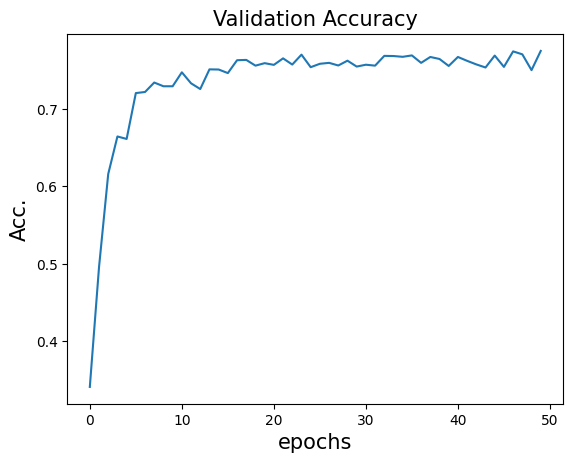

In [11]:
import matplotlib.pyplot as plt

plt.plot(hist.history['val_accuracy'])
plt.title('Validation Accuracy', fontsize=15)
plt.xlabel('epochs', fontsize=15)
plt.ylabel('Acc.', fontsize=15)

plt.show()

## Test Accuracy

Test accuracy 측정 결과 **65% 이상**이 나와야 한다.

In [12]:
### DO NOT MODIFY ###
my_inception.evaluate(x_test, y_test)

313/313 [==============================] - 4s 11ms/step - loss: 1.2418 - accuracy: 0.7580


[1.241757869720459, 0.7580000162124634]